In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

In [86]:
%matplotlib inline

In [140]:
data = loadmat("machine-learning-ex5/ex5/ex5data1.mat")
data.keys()

['ytest',
 'yval',
 '__header__',
 '__globals__',
 'Xtest',
 'Xval',
 'y',
 'X',
 '__version__']

(12, 1)


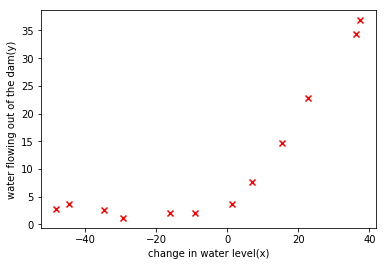

In [192]:
X = data['X']
y = data['y']
X_val = data['Xval']
y_val = data['yval']
X = np.c_[np.ones((X.shape[0])), X]
X_val = np.c_[np.ones((X_val.shape[0])), X_val]
plt.scatter(X[:,1],y, marker='x', c="red")
plt.xlabel("change in water level(x)")
plt.ylabel("water flowing out of the dam(y)")
print y.shape

In [193]:
def linear_cost(theta, X, y, reg):
    h = X.dot(theta.reshape(-1,1))
    m = y.size
    cost = float(1.0/(2*m) * (h-y).T.dot(h-y)) + (reg/(2.0*m))*np.sum(np.square(theta[1:].reshape(-1,1)))
    return cost

In [194]:
initial_theta = np.array([1,1])
linear_cost(initial_theta, X, y, 0)

303.9515255535976

In [225]:
def gradient(theta, X, y, reg):
    m = y.size
    h = X.dot(theta.reshape(-1,1))
    gradient = 1.0/m*X.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    return gradient.flatten()

In [196]:
gradient(initial_theta, X, y, 0)

(12, 2)
(2, 1)


array([ -15.30301567,  598.16741084])

In [222]:
def optimize_theta(X, y, theta, reg = 0.0):
    fit_theta = minimize(linear_cost, theta, args=(X,y,reg), method=None, jac=gradient,options={'maxiter':5000})
    return fit_theta

In [198]:
my_theta = optimize_theta(X, y , initial_theta)
print X.dot(my_theta.x).shape

(12, 2)
(2, 1)
(12, 2)
(2, 1)
(12, 2)
(2, 1)
(12, 2)
(2, 1)
(12, 2)
(2, 1)
(12, 2)
(2, 1)
(12,)


Text(0,0.5,u'water flowing out of the dam(y)')

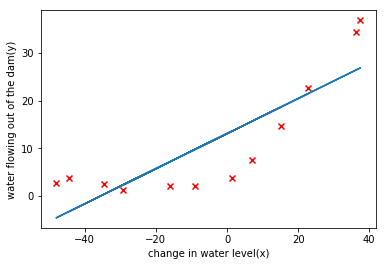

In [238]:
plt.scatter(X[:,1],y, marker='x', c="red")
plt.plot(X[:,1], X.dot(my_theta.x))
plt.xlabel("change in water level(x)")
plt.ylabel("water flowing out of the dam(y)")

### Learning Curve

In [200]:
def learning_curve(X, y, Xval, yval, reg):
    m = y.size
    error_train = np.empty((m, 1))
    error_val = np.empty((m, 1))
    
    for i in np.arange(m):
        best_theta = optimize_theta(X[:i+1], y[:i+1], [1,1])
        error_train[i] = linear_cost(best_theta.x, X[:i+1], y[:i+1], reg)
        error_val[i] = linear_cost(best_theta.x, Xval, yval, reg)
    
    return error_train, error_val

In [239]:
error_train, error_val = learning_curve(X, y, X_val, y_val, 0)

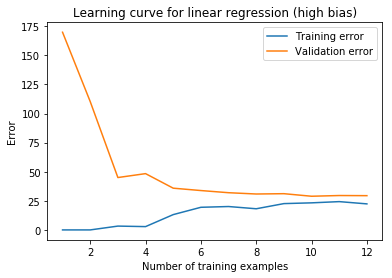

In [203]:
plt.plot(np.arange(1,y.size+1), error_train, label='Training error')
plt.plot(np.arange(1,y.size+1), error_val, label='Validation error')
plt.title('Learning curve for linear regression (high bias)')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(loc="best")


### Polynomial Regression

In [204]:
def poly_features(X, p):
    new_X = X.copy()
    for i in range(p):
        new_X = np.c_[new_X,np.power(new_X[:,1], i+2)]
    return new_X
        

In [205]:
def feature_normalize(X):
    X_norm = X.copy()
    stored_feature_means = np.mean(X_norm,axis=0)
    X_norm[:,1:] = X_norm[:,1:] - stored_feature_means[1:]
    stored_feature_stds = np.std(X_norm,axis=0,ddof=1)
    X_norm[:,1:] = X_norm[:,1:] / stored_feature_stds[1:]
    return X_norm, stored_feature_means, stored_feature_stds


In [206]:
X_poly = poly_features(X, 8)
X_norm, mean, std = feature_normalize(X_poly)

### Learning Polynomial Regression

In [223]:
X_poly = poly_features(X, 5)
X_norm, mean, std = feature_normalize(X_poly) 

In [237]:
new_theta = np.ones(X_norm.shape[1])
best_theta = optimize_theta(X_norm, y, new_theta)
print X[:,1], "\n", X_norm.dot(best_theta.x)

[-15.93675813 -29.15297922  36.18954863  37.49218733 -48.05882945
  -8.94145794  15.30779289 -34.70626581   1.38915437 -44.38375985
   7.01350208  22.76274892] 
[  1.38296155   1.99152962  35.48482178  35.90967905   3.12465315
   1.85800297  14.39826564   2.5035875    4.61750924   3.19531518
   7.62552116  22.51922801]


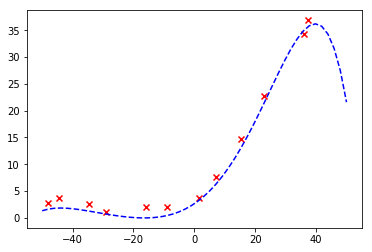

In [276]:
plt.scatter(X[:,1],y, marker='x', c="red")
x_vals = np.linspace(-50, 50, 50)
x_to_plot = np.c_[np.ones((50,1)), x_vals]
x_plot_poly = poly_features(x_to_plot,5)
x_plot_norm, mean, std = feature_normalize(x_plot_poly) 
plt.plot(x_vals, x_plot_norm.dot(best_theta.x), "b--")

### Polynomial Learning with Scikit Learn

In [269]:
poly = PolynomialFeatures(degree=8)
X_poly = poly.fit_transform(X[:,1].reshape(-1,1))

In [270]:
lr = LinearRegression()
lr.fit(X_poly, y)
lr2 = Ridge(alpha=20)
lr2.fit(X_poly, y)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [271]:
plot_x = np.linspace(-60,45,50)
print plot_x.shape
# using coefficients to calculate y
print poly.fit_transform(plot_x.reshape(-1,1)).shape
plot_y = lr.intercept_+ np.sum(lr.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)
plot_y2 = lr2.intercept_ + np.sum(lr2.coef_*poly.fit_transform(plot_x.reshape(-1,1)), axis=1)

(50,)
(50, 9)


Text(0,0.5,u'Water flowing out of the dam (y)')

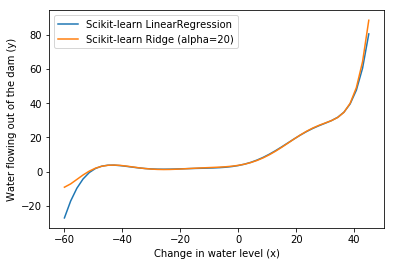

In [275]:
plt.plot(plot_x, plot_y, label='Scikit-learn LinearRegression')
plt.plot(plot_x, plot_y2, label='Scikit-learn Ridge (alpha={})'.format(lr2.alpha))
plt.legend(loc="best")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')